# Advanced Image Manipulation & Background Subtraction
### Image Inpainting using OpenCV

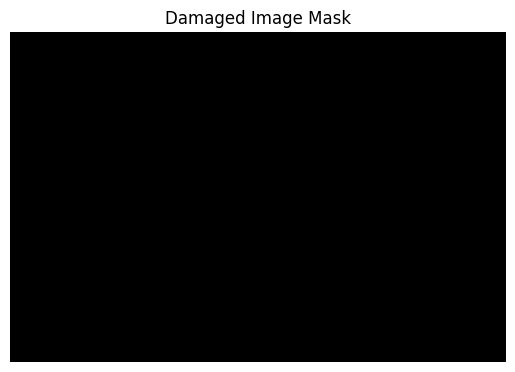

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# reading the damaged image
damaged_img = cv2.imread("image1.jfif")

if damaged_img is None:
    print("Image not found!")
else:
    height, width = damaged_img.shape[:2]

    for i in range(height):
        for j in range(width):
            if damaged_img[i, j].sum() > 0:
                damaged_img[i, j] = 0
            else:
                damaged_img[i, j] = [255, 255, 255]

    mask = damaged_img
    cv2.imwrite('mask.jpg', mask)

    # Convert BGR to RGB for correct display
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    plt.imshow(mask_rgb)
    plt.title("Damaged Image Mask")
    plt.axis("off")
    plt.show() 

img loaded? True
mask loaded? True


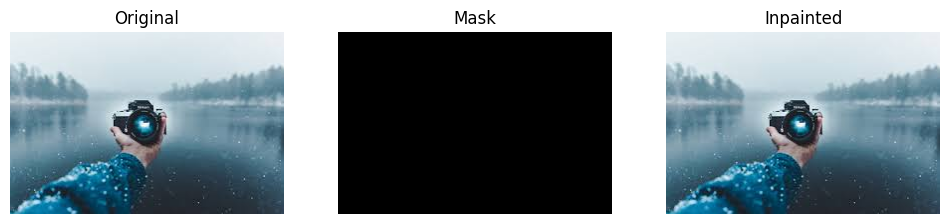

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the image 
img = cv2.imread('image1.jfif') 

# Load the mask you saved earlier
mask = cv2.imread('mask.jpg', 0)   # 0 = grayscale mask

# Safety checks
print("img loaded?", img is not None)
print("mask loaded?", mask is not None)

if img is None or mask is None:
    raise FileNotFoundError("Image or mask not found. Check filenames in your folder.")


_, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

# Inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

# Save output
cv2.imwrite('inpainted.png', dst)

# Display in notebook
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("Inpainted")
plt.axis("off")

plt.show()

### Image Registration

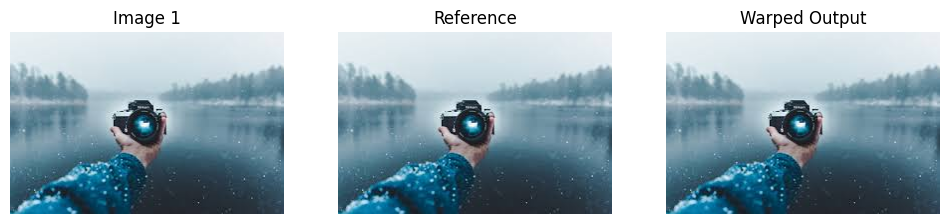

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1_color = cv2.imread("image1.jfif")      
img2_color = cv2.imread("image1.jfif")       

if img1_color is None or img2_color is None:
    raise FileNotFoundError(" Image file not found. Check filenames in folder.")

# Convert to grayscale
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
height, width = img2.shape

# ORB detector
orb = cv2.ORB_create(5000)

kp1, d1 = orb.detectAndCompute(img1, None)
kp2, d2 = orb.detectAndCompute(img2, None)

if d1 is None or d2 is None:
    raise ValueError(" Not enough features found. Use two real images (not a mask).")

# Match descriptors
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(d1, d2)

if len(matches) < 10:
    raise ValueError(" Too few matches. Try different images or increase features.")

matches = sorted(matches, key=lambda x: x.distance)
matches = matches[:int(len(matches) * 0.9)]
no_of_matches = len(matches)

p1 = np.zeros((no_of_matches, 2), dtype=np.float32)
p2 = np.zeros((no_of_matches, 2), dtype=np.float32)

for i, m in enumerate(matches):
    p1[i, :] = kp1[m.queryIdx].pt
    p2[i, :] = kp2[m.trainIdx].pt

# Homography
H, inlier_mask = cv2.findHomography(p1, p2, cv2.RANSAC)

if H is None:
    raise ValueError(" Homography not found. Images may not overlap enough.")

# Warp
transformed = cv2.warpPerspective(img1_color, H, (width, height))

# Save
cv2.imwrite("output.jpg", transformed)

# Show in notebook
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(img1_color, cv2.COLOR_BGR2RGB)); plt.title("Image 1"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB)); plt.title("Reference"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB)); plt.title("Warped Output"); plt.axis("off")
plt.show()

### Background subtraction

In [7]:
import numpy as np
import cv2

# Load video file
cap = cv2.VideoCapture('labtask-5/1111100_Ill_Pain_4096x2160.mov')

# Create background subtractor (MOG2 handles shadows well)
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Show original and foreground mask side by side
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Foreground Mask', fgmask)

    # Press 'Esc' to exit
    if cv2.waitKey(30) & 0xFF == 27:
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

### Foreground Extraction in an Image using Grabcut Algorithm

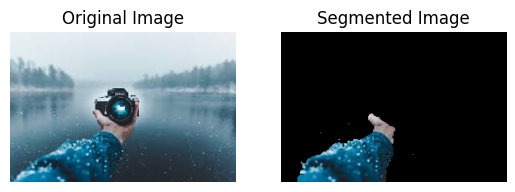

In [8]:
# Python program to illustrate foreground extraction using GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
 
# path to input image specified and 
# image is loaded with imread command
image = cv2.imread('image1.jfif')
 
# create a simple mask image similar
# to the loaded image, with the 
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)
 
# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
 
# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (20, 100, 150, 150)
 
# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3 
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used 
cv2.grabCut(image, mask, rectangle,  
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
 
# In the new mask image, pixels will 
# be marked with four flags 
# four flags denote the background / foreground 
# mask is changed, all the 0 and 2 pixels 
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
 
# The final mask is multiplied with 
# the input image to give the segmented image.
image_segmented = image * mask2[:, :, np.newaxis]
 
# output segmented image with colorbar
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image_segmented, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()